# DIP Assignment 3 - Morphological Operations
Louis Widi Anandaputra - 22/492218/PA/21090

In this task, we would try to tackle the task of morphological operations on binary image. The process would utilize a 3 x 3 structuring element, but experimenting on different structuring element sizes in future works would be recommended. Some predefined structuring element as a 3 x 3 array has been prepared, but custom structuring elements with custom sizes can be utilized (recommended on a square size).

## Preparation

In [1]:
import numpy as np # For utilizing numpy array attributes such as shape
import cv2 # For extracting image as arrays and changing color to Grayscale
import matplotlib.pyplot as plt # For Displaying pre and post processed images
import seaborn as sns # For extra visualization needs

In [2]:
# Define the structuring element 
full= np.array([[1,1,1], 
                [1,1,1],
                [1,1,1]])

cross= np.array([[0,1,0], 
                 [1,1,1],
                 [0,1,0]])

T = np.array([[1,1,1], 
              [0,1,0],
              [0,1,0]])

V = np.array([[0,0,0], # Horizontal kernel
              [1,1,1],
              [0,0,0]])

H = np.array([[0,1,0], # Vertical kernel 
              [0,1,0],
              [0,1,0]])

X = np.array([[1,0,1], 
              [0,1,0],
              [1,0,1]])

Reversed_T = np.array([[0,1,0], 
                      [0,1,0],
                      [1,1,1]])

In [3]:
# Defining the morophological operator
def dilation(image, kernel):
    height, width = image.shape
    k_height, k_width = kernel.shape
    pad_height = k_height // 2
    pad_width = k_width // 2
    
    # Create a padded version of the image to handle border pixels
    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant')
    
    # Initialize the output image with zeros
    output_image = np.zeros_like(image)
    
    # Perform dilation
    for i in range(pad_height, height + pad_height):
        for j in range(pad_width, width + pad_width):
            # Extract the region of interest from the padded image
            roi = padded_image[i - pad_height:i + pad_height + 1, j - pad_width:j + pad_width + 1]
            # Perform element-wise multiplication with the kernel
            result = np.sum(roi * kernel)
            # If at least one pixel under the kernel is 1, set the corresponding pixel in the output image to 1
            if result > 0:
                output_image[i - pad_height, j - pad_width] = 1
    
    return output_image

def erosion(image, kernel):
    height, width = image.shape
    k_height, k_width = kernel.shape
    pad_height = k_height // 2
    pad_width = k_width // 2
    
    # Create a padded version of the image to handle border pixels
    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant')
    
    # Initialize the output image with zeros
    output_image = np.zeros_like(image)
    
    # Perform erosion
    for i in range(pad_height, height + pad_height):
        for j in range(pad_width, width + pad_width):
            # Extract the region of interest from the padded image
            roi = padded_image[i - pad_height:i + pad_height + 1, j - pad_width:j + pad_width + 1]
            # Perform element-wise multiplication with the kernel
            result = np.sum(roi * kernel)
            # If all pixels under the kernel are 1, set the corresponding pixel in the output image to 1
            if result == np.sum(kernel):
                output_image[i - pad_height, j - pad_width] = 1
    
    return output_image

# Opening is erosion followed by dilation
def opening(image, kernel):
    img = np.copy(image)
    img = erosion(img, kernel)
    img = dilation(img, kernel)
    return img

# Clsoing is dilation followed by erosion
def closing(image, kernel):
    img = np.copy(image)
    img = dilation(img, kernel)
    img = erosion(img, kernel)
    return img

## Experimenting on Different Structuring Elements
We would try to see and evaluate the use of different structuring elements on each of the morphological process

Text(0.5, 1.0, 'Closed Image Using Full kernel')

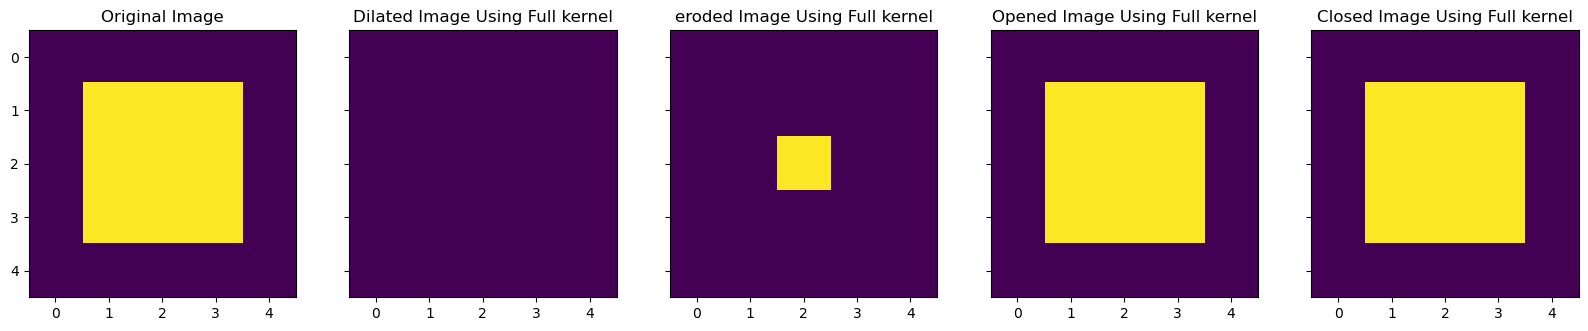

In [4]:
image = np.array([[0, 0, 0, 0, 0],
                    [0, 1, 1, 1, 0],
                    [0, 1, 1, 1, 0],
                    [0, 1, 1, 1, 0],
                    [0, 0, 0, 0, 0]])  

# Another Kernel to be experimented on
# image2 = np.array([[0, 0, 1, 0, 0, 0, 0],
#                     [0, 1, 1, 1, 0, 0, 0],
#                     [0, 1, 1, 1, 1, 0, 0],
#                     [1, 1, 1, 1, 0, 0, 1],
#                     [0, 1, 1, 1, 1, 0, 0],
#                     [0, 0, 1, 0, 0, 0, 0],
#                     [0, 0, 0, 0, 0, 0, 0]])

# full
kernel = [full, 'Full']
dilated = dilation(image, kernel[0])
eroded = erosion(image, kernel[0])
opened = opening(image, kernel[0])
closed = closing(image, kernel[0])

# Plotting the result
fig, ax = plt.subplots (ncols = 5, sharey = True, figsize=(20,20))

ax[0].imshow(image)
ax[1].imshow(dilated)
ax[2].imshow(eroded)
ax[3].imshow(opened)
ax[4].imshow(closed)

ax[0].set_title("Original Image")
ax[1].set_title(f"Dilated Image Using {kernel[1]} kernel")
ax[2].set_title(f"eroded Image Using {kernel[1]} kernel")
ax[3].set_title(f"Opened Image Using {kernel[1]} kernel")
ax[4].set_title(f"Closed Image Using {kernel[1]} kernel")

In [5]:
dilated

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]])

The image that was plotted may seem to have all 0 values, but in reality it would have all 1 values

Text(0.5, 1.0, 'Closed Image Using Cross kernel')

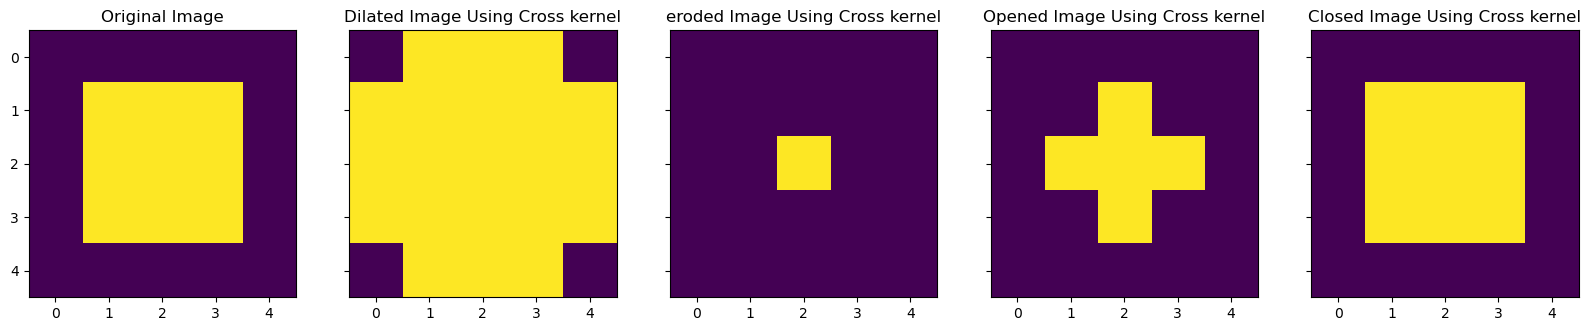

In [6]:
# Cross
kernel = [cross, 'Cross']
dilated = dilation(image, kernel[0])
eroded = erosion(image, kernel[0])
opened = opening(image, kernel[0])
closed = closing(image, kernel[0])

# Plotting the result
fig, ax = plt.subplots (ncols = 5, sharey = True, figsize=(20,20))

ax[0].imshow(image)
ax[1].imshow(dilated)
ax[2].imshow(eroded)
ax[3].imshow(opened)
ax[4].imshow(closed)

ax[0].set_title("Original Image")
ax[1].set_title(f"Dilated Image Using {kernel[1]} kernel")
ax[2].set_title(f"eroded Image Using {kernel[1]} kernel")
ax[3].set_title(f"Opened Image Using {kernel[1]} kernel")
ax[4].set_title(f"Closed Image Using {kernel[1]} kernel")

Text(0.5, 1.0, 'Closed Image Using T kernel')

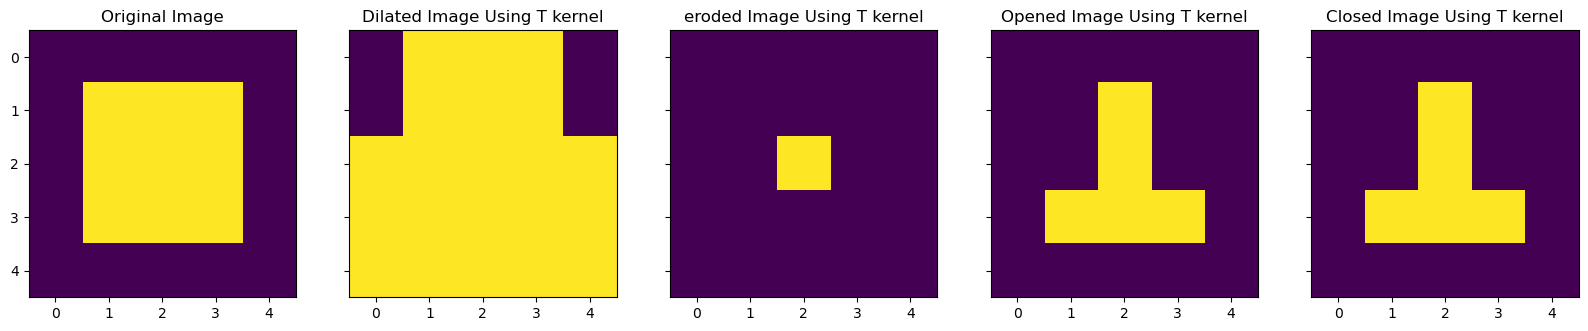

In [7]:
# T
kernel = [T, 'T']
dilated = dilation(image, kernel[0])
eroded = erosion(image, kernel[0])
opened = opening(image, kernel[0])
closed = closing(image, kernel[0])

# Plotting the result
fig, ax = plt.subplots (ncols = 5, sharey = True, figsize=(20,20))

ax[0].imshow(image)
ax[1].imshow(dilated)
ax[2].imshow(eroded)
ax[3].imshow(opened)
ax[4].imshow(closed)

ax[0].set_title("Original Image")
ax[1].set_title(f"Dilated Image Using {kernel[1]} kernel")
ax[2].set_title(f"eroded Image Using {kernel[1]} kernel")
ax[3].set_title(f"Opened Image Using {kernel[1]} kernel")
ax[4].set_title(f"Closed Image Using {kernel[1]} kernel")

Text(0.5, 1.0, 'Closed Image Using H kernel')

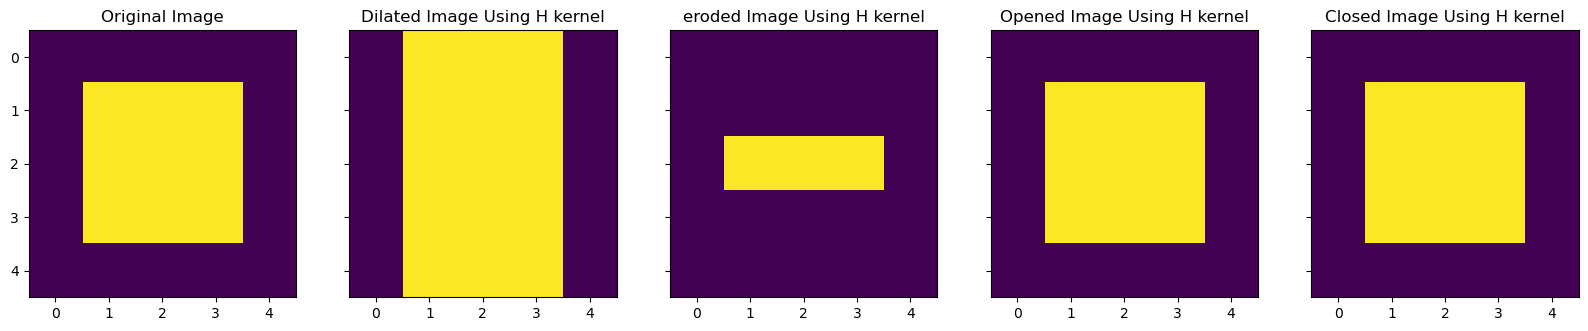

In [8]:
# H 
kernel = [H, 'H']
dilated = dilation(image, kernel[0])
eroded = erosion(image, kernel[0])
opened = opening(image, kernel[0])
closed = closing(image, kernel[0])

# Plotting the result
fig, ax = plt.subplots (ncols = 5, sharey = True, figsize=(20,20))

ax[0].imshow(image)
ax[1].imshow(dilated)
ax[2].imshow(eroded)
ax[3].imshow(opened)
ax[4].imshow(closed)

ax[0].set_title("Original Image")
ax[1].set_title(f"Dilated Image Using {kernel[1]} kernel")
ax[2].set_title(f"eroded Image Using {kernel[1]} kernel")
ax[3].set_title(f"Opened Image Using {kernel[1]} kernel")
ax[4].set_title(f"Closed Image Using {kernel[1]} kernel")

Text(0.5, 1.0, 'Closed Image Using V kernel')

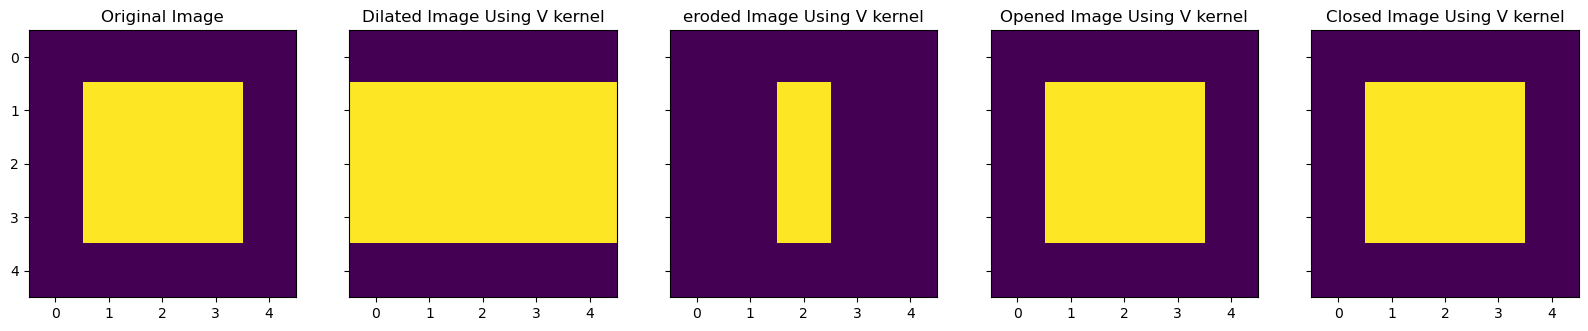

In [9]:
# V
kernel = [V, 'V']
dilated = dilation(image, kernel[0])
eroded = erosion(image, kernel[0])
opened = opening(image, kernel[0])
closed = closing(image, kernel[0])

# Plotting the result
fig, ax = plt.subplots (ncols = 5, sharey = True, figsize=(20,20))

ax[0].imshow(image)
ax[1].imshow(dilated)
ax[2].imshow(eroded)
ax[3].imshow(opened)
ax[4].imshow(closed)

ax[0].set_title("Original Image")
ax[1].set_title(f"Dilated Image Using {kernel[1]} kernel")
ax[2].set_title(f"eroded Image Using {kernel[1]} kernel")
ax[3].set_title(f"Opened Image Using {kernel[1]} kernel")
ax[4].set_title(f"Closed Image Using {kernel[1]} kernel")

It can be seen that dilation would follow the shape of the kernel while erosion would follow the name of the kernel

Text(0.5, 1.0, 'Closed Image Using X kernel')

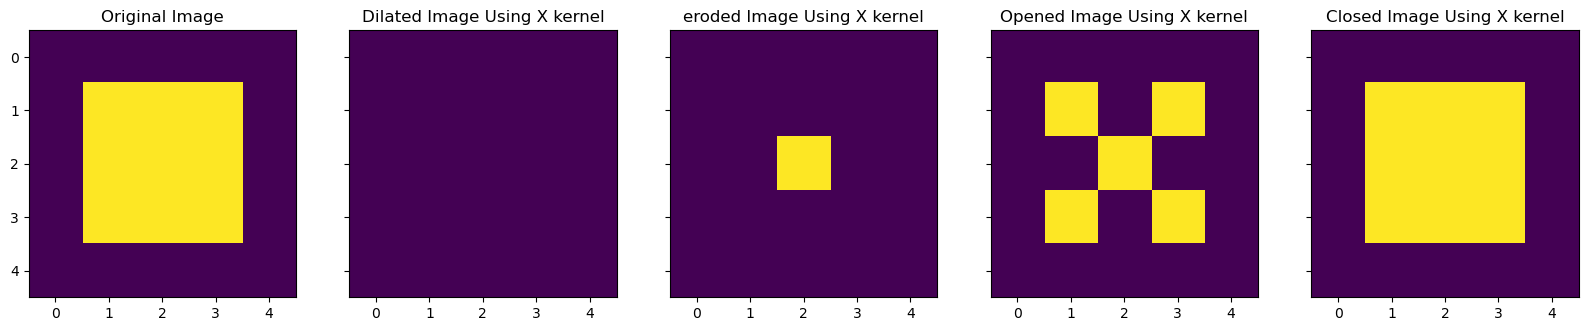

In [10]:
# X
kernel = [X, 'X']
dilated = dilation(image, kernel[0])
eroded = erosion(image, kernel[0])
opened = opening(image, kernel[0])
closed = closing(image, kernel[0])

# Plotting the result
fig, ax = plt.subplots (ncols = 5, sharey = True, figsize=(20,20))

ax[0].imshow(image)
ax[1].imshow(dilated)
ax[2].imshow(eroded)
ax[3].imshow(opened)
ax[4].imshow(closed)

ax[0].set_title("Original Image")
ax[1].set_title(f"Dilated Image Using {kernel[1]} kernel")
ax[2].set_title(f"eroded Image Using {kernel[1]} kernel")
ax[3].set_title(f"Opened Image Using {kernel[1]} kernel")
ax[4].set_title(f"Closed Image Using {kernel[1]} kernel")

In [11]:
dilated

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]])

This dilation case is the same as the one in the full kernel

Text(0.5, 1.0, 'Closed Image Using R_T kernel')

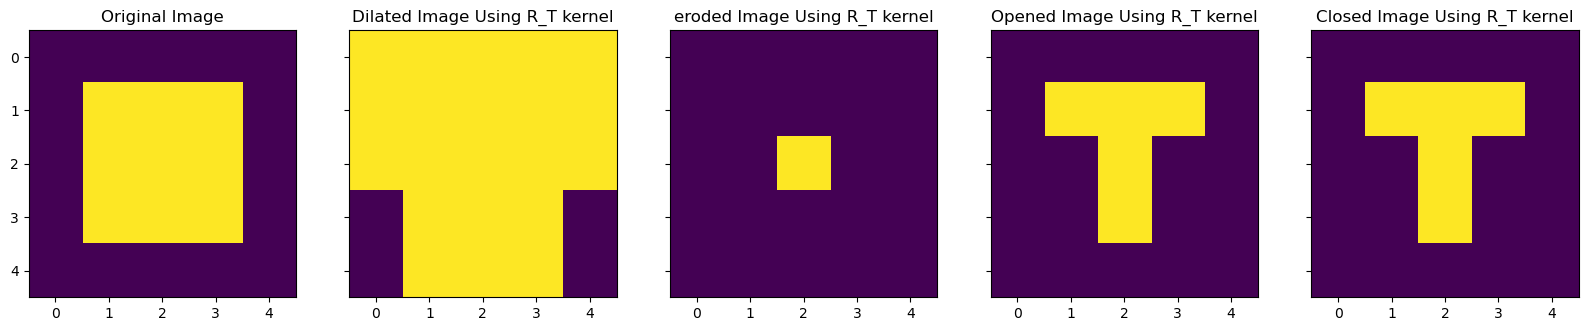

In [12]:
# Reversed_T 
kernel = [Reversed_T, 'R_T']
dilated = dilation(image, kernel[0])
eroded = erosion(image, kernel[0])
opened = opening(image, kernel[0])
closed = closing(image, kernel[0])

# Plotting the result
fig, ax = plt.subplots (ncols = 5, sharey = True, figsize=(20,20))

ax[0].imshow(image)
ax[1].imshow(dilated)
ax[2].imshow(eroded)
ax[3].imshow(opened)
ax[4].imshow(closed)

ax[0].set_title("Original Image")
ax[1].set_title(f"Dilated Image Using {kernel[1]} kernel")
ax[2].set_title(f"eroded Image Using {kernel[1]} kernel")
ax[3].set_title(f"Opened Image Using {kernel[1]} kernel")
ax[4].set_title(f"Closed Image Using {kernel[1]} kernel")

From the experimentation on different structuring elements, it has been known that dilation and erosion would enable significant enlargement and shrinkage of image, while closing and opening would only do a moderate amount of the process. This would lead to the different usage of each operator, as well as the combination of different sequence of operators as well as structuring elements.

In respect to the structuring elements, there are tendencies of the image having shaped as their name would suggest when eroding but it would have a tendency to follow the structuring element shape for dilation and the moderate morphological operations. For example, the horizontal (H) structuring would enlarge vertically as the kernel shapes vertically, but shrink the image horizontally while vertical (V) structuring element would do the opposite. 

## Morphological Operations on Real Segmentation

In [13]:
# Defining a global threshold
def global_threshold(image, thres_value, val_high, val_low):
    img = image.copy()
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if image[i,j] < thres_value:
                img[i,j] = val_high
            else:
                img[i,j] = val_low
    return img

In [14]:
#img negative
def image_negative(image):
    #np.copy so that each function doesn't interfere
    img=np.copy(image)
    height, width = img.shape
    for i in range(0, height - 1):
        for j in range(0, width - 1):
            # Get the pixel value
            pixel = img[i, j]
            # subtracting it from 255
            pixel = 255 - pixel
            # Store new values in the pixel
            img[i, j] = pixel
    return img

(-0.5, 799.5, 342.5, -0.5)

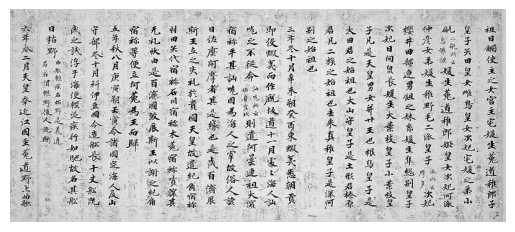

In [15]:
# Acquiring the image
image = cv2.imread('image.jpeg')
image_gray= cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image_gray, cmap=plt.cm.gray)
plt.axis('off')

<AxesSubplot: ylabel='Count'>

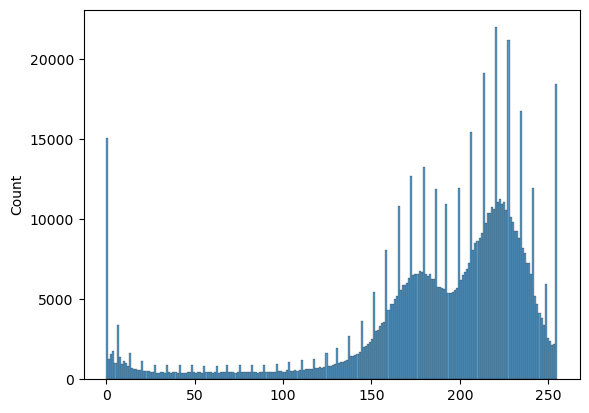

In [16]:
hist = image.flatten()
sns.histplot(hist)

From this Histogram, we would choose 95 as it would serve as one of the lower points on a somewhat bimodal histogram of color values distribution (bimodal as there are many pixels having 0 value and the other having lighter > 150 value)

In [17]:
# Kernel change may be appropriate for determining which are the best morphological structuring element
kernel = [H,'H'] 
thresholded = global_threshold(image_gray,95,1,0)
thresholded_dilated = dilation(thresholded,kernel[0])
thresholded_eroded = erosion(thresholded,kernel[0])
thresholded_opened = opening(thresholded,kernel[0])
thresholded_closed = closing(thresholded,kernel[0])

Text(0.5, 1.0, 'Closed Image Using H kernel')

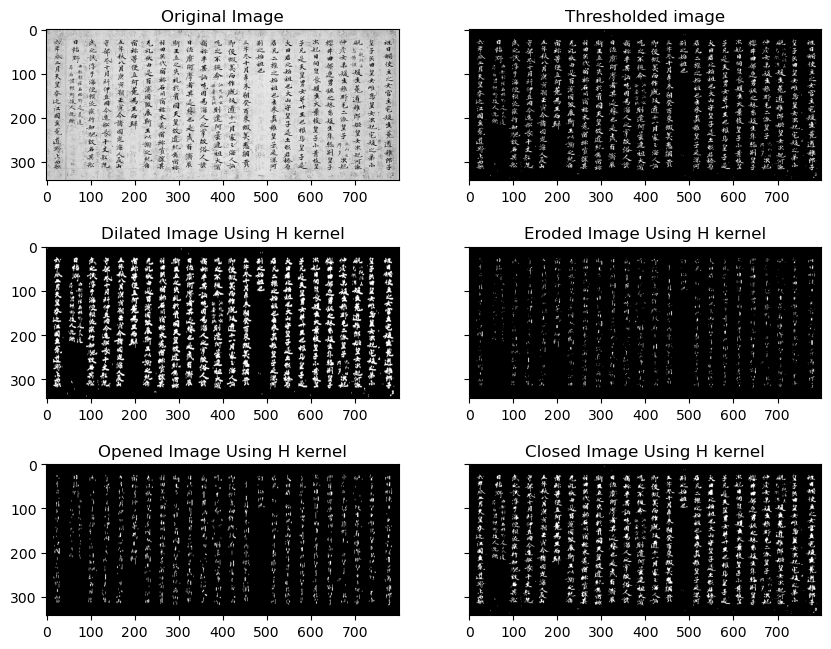

In [18]:
# Plotting the result
fig, ax = plt.subplots (3,2, sharey = True, figsize=(10,8))

ax[0][0].imshow(image_gray, cmap=plt.cm.gray)
ax[0][1].imshow(thresholded, cmap=plt.cm.gray)
ax[1][0].imshow(thresholded_dilated, cmap=plt.cm.gray)
ax[1][1].imshow(thresholded_eroded, cmap=plt.cm.gray)
ax[2][0].imshow(thresholded_opened, cmap=plt.cm.gray)
ax[2][1].imshow(thresholded_closed, cmap=plt.cm.gray)


ax[0][0].set_title("Original Image")
ax[0][1].set_title("Thresholded image")
ax[1][0].set_title(f"Dilated Image Using {kernel[1]} kernel")
ax[1][1].set_title(f"Eroded Image Using {kernel[1]} kernel")
ax[2][0].set_title(f"Opened Image Using {kernel[1]} kernel")
ax[2][1].set_title(f"Closed Image Using {kernel[1]} kernel")

It can be seen that in the real case segmentation result which were applied with morphological operation, had different results depending on which morphological operations were used. Dilation would make a big "enlargement" while erosion would make a dramatic "shrinking". While on the other hand, Opening and Closing managed to do a moderate shrinking and enlargement respectively. 

It can also be seen that the noise created from dilation process can be removed by only using closing process. Similarly, informations were not lost dramatically by using opening, instead of using erosion. This would mean the need of experimenting and considering the best morphological operator for each images

## Conclusion

As there have been mentioned on previous descriptions, there are various types of structuring element and four different types of morphological operations. This process and structuring elements would transform images differently. It is best to know what type of segmentation an image would have and to generalize it if the number of image is abundant. Experimenting with various types and sizes of structuring elements would also be beneficial as to acquire the best representation of information that we would want to segment. This would then conclude the findings and evaluation of different morphological operations by various types of structuring elements.

© Louis Widi Anandaputra - 2023